In [1]:
#
#IMPORTS
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import imageio as io
import os
import math

In [2]:

#
#DEFINE POLYGON VERTICES
#
boxside1 =np.array([[0,0.015625],
              [0.015625*.866,0.015625*1.5],
              [0.015625*2*.866,0.015625],
             [0.015625*.866,0.015625*.5]])
boxside2=np.array([[0.015625*2*.866,0.015625],
              [0.015625*2*.866,0],
              [0.015625*.866,0.015625*-.5],
              [0.015625*.866,0.015625*.5]])
boxside3=np.array([[0,0.015625],
              [0.015625*.866,0.015625*.5],
              [0.015625*.866,0.015625*-.5],
              [0,0]])  

In [3]:
#
#DEFINE POLYGON COLORS AND HONEYCOMB PATTERN
#
col1=np.array([.16,0,.16])
col2=np.array([.16,.16,0])
col3=np.array([0,.16,0])
lowcol=np.array([0,0,0])
medcol=np.array([.167,.167,.167])
highcol=np.array([.333,.333,.333 ])


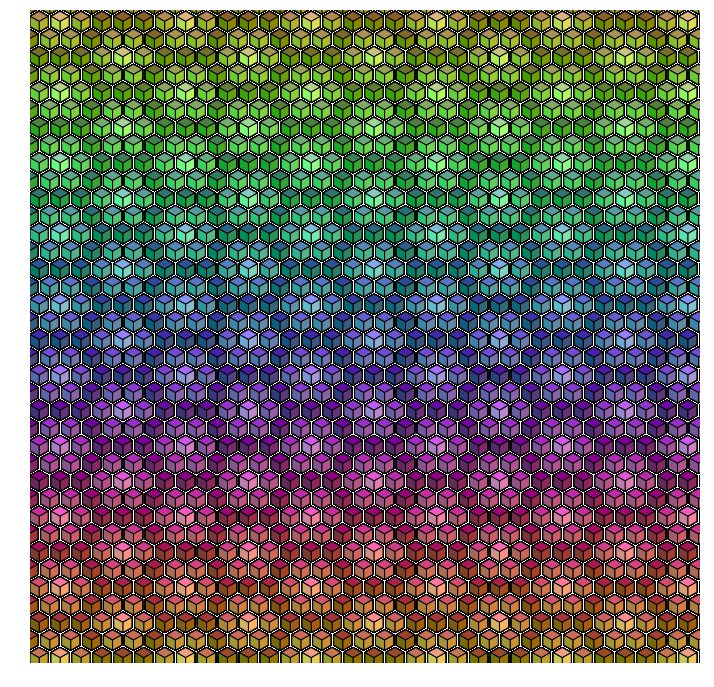

In [4]:
#
#DEFINE PLOT AND COLOR/PATCHES LISTS
#

fig, ax = plt.subplots(figsize=(12,12))
colors = []
patches = []
#
#ITERATE OVER GRID, APPENDING POLYGONS AND COLORS
#
def make_grid(start_hue):
    start_honey=3-start_hue%4
    start_honey_row=(start_honey+1)%2
    for i in range(38):
        for j in range(33):
            if i%2==0:
                #EVEN ROWS NO INDENTATION OF POLYGONS
                position = np.array([[2*j*0.015625,i*1.734*0.015625],
                               [2*j*0.015625,i*1.734*0.015625],
                               [2*j*0.015625,i*1.734*0.015625],
                               [2*j*0.015625,i*1.734*0.015625]])
            elif i%2==1:
                #ODD ROWS ARE INDENTED
                position = np.array([[2*j*0.015625-.983*0.015625,i*1.734*0.015625],
                           [2*j*0.015625-.983*0.015625,i*1.734*0.015625],
                           [2*j*0.015625-.983*0.015625,i*1.734*0.015625],
                           [2*j*0.015625-.983*0.015625,i*1.734*0.015625]])
            #ADD HONEYCOMB PATTERN
            if  i%4==0:
                if (j%6==3 or j%6==4 or j%6==5):
                    colcol=lowcol
                elif j%6==0:
                    colcol=medcol
                elif j%6==1:
                    colcol=highcol
                elif j%6==2:
                    colcol=medcol
            elif i%4==1:
                if j%3==0:
                    colcol=lowcol
                elif j%3 > 0:
                    colcol=medcol
            elif i%4==2:
                if (j%6==0 or j%6==1 or j%6==2):
                    colcol=lowcol
                elif j%6==3:
                    colcol=medcol
                elif j%6==4:
                    colcol=highcol
                elif j%6==5:
                    colcol=medcol
            elif i%4==3:
                if j%3==0:
                    colcol=lowcol
                elif j%3 > 0:
                    colcol=medcol
            polygonverts1=boxside1+position
            polygonverts2=boxside2+position
            polygonverts3=boxside3+position
            rowcol     = np.array([(math.cos(start_hue+2*math.pi*i/38)+1)/4,
                                 (math.cos(start_hue+2*math.pi*i/38+(2*math.pi)/3)+1)/4,
                                 (math.cos(start_hue+2*math.pi*i/38+(4*math.pi)/3)+1)/4])
            polygon1 = Polygon(polygonverts1, True)
            patches.append(polygon1)
            colors.append(tuple(col1+rowcol+colcol))
            polygon2 = Polygon(polygonverts2, True)
            patches.append(polygon2)
            colors.append(tuple(col2+rowcol+colcol))
            polygon3 = Polygon(polygonverts3, True)
            patches.append(polygon3)
            colors.append(tuple(col3+rowcol+colcol))
    #
    #APPEND PATCHES AND COLORS TO PLOT, SHOW PLOT 
    #
    p = PatchCollection(
        patches,
        edgecolors=(0,0,0),
        facecolors=colors,
        cmap=matplotlib.cm.jet,
        alpha=1)
    ax.add_collection(p)
    plt.axis('off')
    filename = 'boxquilt'+str(start_hue)+'.jpg'
    plt.savefig(filename,dpi=300)
    
for i in range(1,38):
    make_grid(i)
    

    

In [5]:
file_names = sorted((fn for fn in os.listdir('.') if fn.startswith('boxquilt')))
with io.get_writer('box_quilt.gif', mode='I', duration=0.1) as writer:
    for filename in file_names:
        image = io.imread(filename)
        writer.append_data(image)
writer.close()